## Applied ML
### Submitted by: Shivani Goyal | R00183301

Importing libraries

In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
os.getcwd()
collection_train = "train/"
train_x,train_y=[],[]

# Part A: Pre-processing Phase

1. Reading the Data From Directory
2. Normalizing the image
3. Resizing the image
4. Adding cat/dog labels

In [3]:
#Going over to every image in the Directory
for i, filename in enumerate(os.listdir(collection_train)):
    #Reading the iamges  
    image = cv2.imread(collection_train+filename)
    if image is None:
        #Skipping the Non-Image Files
        continue
    #Because some values are in float
    image = image.astype('uint8')
    # Normalizing the image
    image = image / 255.0
    #Resizing the image
    resized = cv2.resize(image,(64,64),interpolation=cv2.INTER_CUBIC)
    d1,d2,d3=resized.shape
    #Converting to single row multiple columns
    data_reshaped = np.squeeze(resized.reshape((1,d1*d2*d3)))
    if "dog" in filename:
        #adding if file name is dog
        train_y.append(1)
    elif "cat" in filename:
        #adding if file name is cat
        train_y.append(0)
    #Adding every images
    train_x.append(data_reshaped)

### Shape of Data


In [4]:
train_x = np.array(train_x)
train_y = np.array(train_y)

print("Data shape: {}".format(train_x.T.shape))
# np.array(test_x).T.shape

Data shape: (12288, 25000)


### Displaying Data
This is a helper function to display images.

In [5]:
def show_images(train, train_label, index):
    label={0:"Cat",1:"Dog"}
    image = train[index]
    image = image.reshape((64, 64, 3))
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title("This is a {}".format(label[train_label[index]]))
    plt.show()

Train Image
--

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


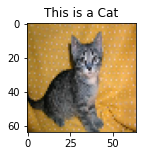

In [6]:
show_images(train_x, train_y, 1)

### PCA

Standardizing the features

In [7]:
# Standardizing the features of Train
dataset_train = StandardScaler().fit_transform(train_x)
dataset_train = pd.DataFrame(train_x)

Performing PCA for train

In [8]:
pca = PCA(n_components=10)
#Train
pca_dataset_train = pca.fit_transform(dataset_train)
pca_dataset_train = pd.DataFrame(pca_dataset_train)

In [9]:
df=pd.DataFrame(train_y,columns=["Target"])
#Now Concating the x_label with the reduces features
finaldataset_train = pd.concat([pca_dataset_train, df['Target']], axis = 1)
finaldataset_train

,0,1,2,3,4,5,6,7,8,9,Target
0,-5.185262,0.522772,-4.765680,1.046827,1.717587,0.264141,-1.889632,-1.897272,3.250576,-3.935077,1
1,4.802157,-3.623385,-3.906826,9.808362,0.928579,-3.290950,-0.952788,4.260973,16.442108,-10.989568,0
2,10.303135,12.662460,-15.704076,-1.918802,-11.565415,-4.852261,1.467835,2.692477,3.180459,-0.879740,1
3,-10.327139,7.018791,-2.175690,-9.626730,1.971104,-3.704553,-0.350395,-7.966379,-1.775566,-3.615795,0
4,41.262532,2.652720,13.481989,5.152247,9.076239,0.272043,-6.495985,6.293491,0.536090,-0.387926,0
...,...,...,...,...,...,...,...,...,...,...,...
24995,-21.522582,9.603597,-4.341275,-2.694544,1.530616,-0.073675,-1.032248,-3.434957,-1.342306,5.385943,1
24996,-3.539956,3.765085,8.253899,-1.326430,-0.181193,-2.335913,-2.355092,-2.739142,-3.114066,4.560281,1
24997,6.322112,-4.621676,1.122968,3.328433,3.200979,6.724802,4.104202,-1.901891,-2.890095,-4.872210,1
24998,-4.254534,-2.612749,-7.146153,-4.574160,5.792135,-14.735891,-9.797766,0.694472,-0.371711,-5.395997,0


# Part B: Training Phase

Splitting the data into train-test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(pca_dataset_train, train_y, test_size=0.2)

Defining various models namely:
1. Decision Tree
2. Gradient Boosting
3. Gaussian Naive Bayes
4. Random Forest
5. SVM
6. K-nearest Neighbor
7. MLP Classifier

In [11]:
modelnames =["DecisionTree","Gradient Boosting ","Gaussian Naive Bayes",
             "Random Forest","SVM","K-nearest Neighbor","MLP Classifier"]
models = [DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB(),RandomForestClassifier(max_depth=2, random_state=0)
           ,svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'),KNeighborsClassifier(n_neighbors=5),
           MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)]

for i,model in enumerate(models):
    model.fit(X_train, y_train)
    # evaluate the model
    results = model.predict(X_test)
    print (modelnames[i],metrics.accuracy_score(results, y_test))

DecisionTree 0.5544
Gradient Boosting  0.6028
Gaussian Naive Bayes 0.5934
Random Forest 0.558
SVM 0.557
K-nearest Neighbor 0.5726
MLP Classifier 0.6102


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Part C: Optimization phase:

We will be optimizing 3 models:
1. Decision Tree
2. SVM
3. K-NN
<br>
Optimization is done by hyper-parameter tuning on above chosen model with below defined combination of parameters using GridSearchCV

In [12]:
classifier=[DecisionTreeClassifier(),svm.SVC(),KNeighborsClassifier()]

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

parameter_space = {'n_neighbors': np.arange(1, 25)}

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  


for x in range(0,len(classifier)):  
    if x ==0:
        clf = GridSearchCV(classifier[x], tree_para, cv=5)
    elif x==1:
        clf = GridSearchCV(classifier[x], param_grid, refit = True, verbose = 3)
    else:
        clf = GridSearchCV(classifier[x], parameter_space, n_jobs=-1, cv=3)

    clf.fit(X_train, y_train)
    print(clf.score(X_train, y_train))
    print(clf.best_params_)
    print("-------------")


0.60475
{'criterion': 'gini', 'max_depth': 6}
-------------
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=  11.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=  11.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=  11.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=  11.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=  11.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   8.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   9.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   8.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   8.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 200.0min finished


0.6339
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-------------
0.6492
{'n_neighbors': 24}
-------------


## Conclusion
As we can see the result of GridSearchCV gives the best params and model as **K-NN with 64.92%** 

# Thank you!